In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.manifold import TSNE

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
from keras.applications import VGG16

In [6]:
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

In [7]:
from keras.layers import Dropout, Flatten, Dense, Activation

In [8]:
import random, os
from glob import glob
from random import shuffle

In [9]:
from keras.models import Model

In [10]:
from keras.models import load_model

In [11]:
from sklearn.decomposition import PCA

In [12]:
from sklearn.neighbors import NearestNeighbors

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [15]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [16]:
from sklearn.metrics import pairwise_distances

In [ ]:
##import and check the data on how vectors are represented
# PCA 

In [17]:
df_all_cloth = pd.read_pickle("./df_all__.pkl")

In [18]:
df_all_cloth.head(2)

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,category
dress_0002f472ab.jpg,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,7.447515,26.518192,0.0,0.0,dresses
dress_55b27a9d8c.jpg,10.007294,2.042278,0.0,0.0,0.0,0.0,2.670494,0.0,0.0,0.0,...,0.0,0.0,0.0,0.960632,3.271157,0.000000,0.000000,0.0,0.0,dresses


In [19]:
df_all_cloth.shape

(36503, 2501)

In [ ]:
##load the model

In [20]:
NN = load_model('vgg16_8_new.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [21]:
NN.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [22]:
model = Model(inputs=NN.inputs,outputs=NN.get_layer('dropout_3').output)

In [23]:
model.output

<tf.Tensor 'dropout_3/cond/Merge:0' shape=(?, 2500) dtype=float32>

In [ ]:
# Reducing number of features in the data set to 10, using PCA

In [49]:
pca = PCA(n_components=.90, svd_solver='auto')

In [50]:
# dresses
pca_reduced_dress = pca.fit_transform(df_all_cloth[df_all_cloth.category == 'dresses'].iloc[:,:2500])

In [26]:
pca.explained_variance_ratio_.cumsum()

array([0.5136014 , 0.69521654, 0.77356476, 0.8118723 , 0.8451507 ,
       0.8643535 , 0.8782576 , 0.88964915, 0.89825636, 0.9062037 ],
      dtype=float32)

In [27]:
df_reduced_dress = pd.DataFrame(pca_reduced_dress, index=df_all_cloth[df_all_cloth.category == 'dresses'].index)

In [28]:
## combine reduced DataFrame with categories
d = df_all_cloth[df_all_cloth.category == 'dresses'].iloc[:,2500:2501].copy()

In [29]:
df_cat_dress = pd.merge(df_reduced_dress, d, left_index=True, right_index=True)

In [30]:
df_cat_dress.head(2)

,0,1,2,3,4,5,6,7,8,9,category
dress_0002f472ab.jpg,-253.075882,55.684837,-34.351784,-18.207188,79.555466,-44.056179,-15.583304,3.933052,-5.807668,-15.256828,dresses
dress_55b27a9d8c.jpg,-156.570999,-145.063828,36.358997,-4.375686,8.336767,-29.093311,9.505518,5.565121,-10.503594,-5.342972,dresses


In [31]:
# denim
pca = PCA(n_components=10, svd_solver='auto')
pca_reduced_denim = pca.fit_transform(df_all_cloth[df_all_cloth.category == 'denim'].iloc[:,:2500])

In [32]:
pca.explained_variance_ratio_.cumsum()

array([0.8018303 , 0.856599  , 0.8944813 , 0.91195446, 0.9231504 ,
       0.9315885 , 0.93840057, 0.9443586 , 0.94884795, 0.9531445 ],
      dtype=float32)

In [33]:
df_reduced_denim = pd.DataFrame(pca_reduced_denim, index=df_all_cloth[df_all_cloth.category == 'denim'].index)

In [34]:
## combine reduced DataFrame with categories
d = df_all_cloth[df_all_cloth.category == 'denim'].iloc[:,2500:2501].copy()

In [35]:
df_cat_denim = pd.merge(df_reduced_denim, d, left_index=True, right_index=True)

In [36]:
# tops
pca_reduced_tops = pca.fit_transform(df_all_cloth[df_all_cloth.category == 'tops'].iloc[:,:2500])

In [37]:
pca.explained_variance_ratio_.cumsum()

array([0.7483174 , 0.8525814 , 0.8848041 , 0.9042048 , 0.9208664 ,
       0.92986196, 0.9362663 , 0.94160026, 0.9457105 , 0.94956225],
      dtype=float32)

In [38]:
df_reduced_tops = pd.DataFrame(pca_reduced_tops, index=df_all_cloth[df_all_cloth.category == 'tops'].index)

In [39]:
## combine reduced DataFrame with categories
d = df_all_cloth[df_all_cloth.category == 'tops'].iloc[:,2500:2501].copy()

In [40]:
df_cat_tops = pd.merge(df_reduced_tops, d, left_index=True, right_index=True)

In [41]:
# skirts
pca_reduced_skirts = pca.fit_transform(df_all_cloth[df_all_cloth.category == 'skirts'].iloc[:,:2500])

In [42]:
pca.explained_variance_ratio_.cumsum()

array([0.46573013, 0.6012573 , 0.67610484, 0.72645277, 0.77038825,
       0.8005597 , 0.8252579 , 0.84294194, 0.8565895 , 0.87005836],
      dtype=float32)

In [43]:
df_reduced_skirts = pd.DataFrame(pca_reduced_skirts, index=df_all_cloth[df_all_cloth.category == 'skirts'].index)

In [44]:
## combine reduced DataFrame with categories
d = df_all_cloth[df_all_cloth.category == 'skirts'].iloc[:,2500:2501].copy()

In [45]:
df_cat_skirts = pd.merge(df_reduced_skirts, d, left_index=True, right_index=True)

In [46]:
# shorts
pca_reduced_shorts = pca.fit_transform(df_all_cloth[df_all_cloth.category == 'shorts'].iloc[:,:2500])

In [47]:
pca.explained_variance_ratio_.cumsum()

array([0.37498865, 0.55992967, 0.6738316 , 0.7274615 , 0.7671005 ,
       0.79606503, 0.82311743, 0.84221417, 0.8570629 , 0.86770195],
      dtype=float32)

In [48]:
df_reduced_shorts = pd.DataFrame(pca_reduced_shorts, index=df_all_cloth[df_all_cloth.category == 'shorts'].index)

In [56]:
## combine reduced DataFrame with categories
d = df_all_cloth[df_all_cloth.category == 'shorts'].iloc[:,2500:2501].copy()

In [57]:
df_cat_shorts = pd.merge(df_reduced_shorts, d, left_index=True, right_index=True)

In [58]:
list_df = [df_cat_dress, df_cat_denim, df_cat_tops, df_cat_skirts, df_cat_shorts]

In [59]:
df_all_ = pd.concat(list_df)

In [60]:
print(df_all_.shape)
df_all_.head(2)

(36503, 11)


,0,1,2,3,4,5,6,7,8,9,category
dress_0002f472ab.jpg,-253.075882,55.684837,-34.351784,-18.207188,79.555466,-44.056179,-15.583304,3.933052,-5.807668,-15.256828,dresses
dress_55b27a9d8c.jpg,-156.570999,-145.063828,36.358997,-4.375686,8.336767,-29.093311,9.505518,5.565121,-10.503594,-5.342972,dresses


_Combining two DataFrames with links_

In [51]:
# open DataFrame with all info of data set, including prices and links
df_all_info_clothing = pd.read_pickle("./df_all_info_clothing.pkl")

In [52]:
df_all_info_clothing = df_all_info_clothing.set_index('img_name')

In [53]:
# select only links
df_ = df_all_info_clothing.web_link.copy()

In [54]:
df_ = df_.reset_index()

In [61]:
# copy just in case
test = df_all_.copy()

In [62]:
test = test.reset_index()

In [63]:
test.columns = ['img_name', 0,1,2,3,4,5,6,7,8,9,10]

In [64]:
result = pd.merge(test, df_, how='left', on='img_name')

In [65]:
result.drop_duplicates('img_name', inplace=True)

In [66]:
result = result.set_index('img_name')

In [67]:
result.head(2)

,0,1,2,3,4,5,6,7,8,9,10,web_link
img_name,,,,,,,,,,,,
dress_0002f472ab.jpg,-253.075882,55.684837,-34.351784,-18.207188,79.555466,-44.056179,-15.583304,3.933052,-5.807668,-15.256828,dresses,https://www.shopstyle.com/g/women/cos/tied-poc...
dress_55b27a9d8c.jpg,-156.570999,-145.063828,36.358997,-4.375686,8.336767,-29.093311,9.505518,5.565121,-10.503594,-5.342972,dresses,https://www.shopstyle.com/g/women/tommy-hilfig...


_Defining various fuctions for the recommendations_

In [68]:
import PIL

def convert_image_to_bgr_numpy_array(image_path, size=(224,224)):
    image = PIL.Image.open(image_path).resize(size)
    img_data = np.array(image.getdata(), np.float32).reshape(*size, -1)
    # swap R and B channels
    img_data = np.flip(img_data, axis=2)
    return img_data

def prepare_image(image_path):
    im = convert_image_to_bgr_numpy_array(image_path)

    # these subtractions are just mean centering the images 
    # based on known means for different color channels
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68

    im = np.expand_dims(im, axis=0) # adjust to (1, 3, 224, 224) for generating keras prediction
    return im

In [69]:
def img_show(path):    
    img=mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()

In [70]:
def cat_cloth_test(list_inx, df, num_column_category,num):
    df = df.reset_index()
    clothing = list(df.iloc[list_inx,0]) #returns list of imgs
    category = list(df.iloc[list_inx,num_column_category]) #returns category
    link = list(df.iloc[list_inx,num]) #returns list of links to the images
    cat_cloth = list(zip(category, clothing, link))
    return cat_cloth
    

In [ ]:
# Categories: {'denim': 0, 'dresses': 1, 'shorts': 2, 'skirts': 3, 'tops': 4}

In [71]:
cat_dict = {0: 'denim', 1: 'dresses', 2: 'shorts', 3: 'skirts', 4: 'tops'}

In [72]:
def show_img_1(img_name, df, start, num_dimen, cat_column, num_column_link):
    img = prepare_image(path_to_test + img_name)
    # predict the category for proper DataFrame search
    num_cat = np.argmax(NN.predict(img)) # number of category by majority vote
    category = cat_dict[num_cat]
    # resizing/transforming img for recommendation
    img_pred = model.predict(img)
    m = img_pred.reshape(1,2500)
    img_red = pca.transform(m)
    # Finding nearest imgs
    index = pairwise_distances(img_red,df[df[cat_column] == category].iloc[:,:num_dimen],metric='cosine').argsort().tolist()[0][start:20]
    near_to_img = cat_cloth_test(index,df[df[cat_column] == category], cat_column+1, num_column_link+1) # since reset index +1
    #print(near_to_img)
    
    img_show(path_to_test + img_name)
    plt.show()
    plot_clothing_(near_to_img)
    plt.show()
    print("Link to the photo 1: " + near_to_img[0][2])
    print("Link to the photo 2: " + near_to_img[1][2])
    print("Link to the photo 3: " + near_to_img[2][2])
    print("Link to the photo 4: " + near_to_img[3][2])
    

In [76]:
# model's flawes - for miscategorized items (dresses)

def show_img_2(img_name, df, start, num_dimen, cat_column, num_column_link):
    img = prepare_image(path_to_test + img_name)
    # resizing/transforming img for recommendation
    img_pred = model.predict(img)
    m = img_pred.reshape(1,2500)
    img_red = pca.transform(m)
    # Finding nearest imgs
    index = pairwise_distances(img_red,df[df[cat_column] == 'dresses'].iloc[:,:num_dimen],metric='cosine').argsort().tolist()[0][start:20]
    near_to_img = cat_cloth_test(index,df[df[cat_column] == 'dresses'], cat_column+1, num_column_link+1)
    #print(near_to_img)
    
    img_show(path_to_test + img_name)
    plt.show()
    plot_clothing_(near_to_img)
    plt.show()
    print("Link to the photo 1: " + near_to_img[0][2])
    print("Link to the photo 2: " + near_to_img[1][2])
    print("Link to the photo 3: " + near_to_img[2][2])
    print("Link to the photo 4: " + near_to_img[3][2])
    

In [73]:
def plot_clothing_(list_indexes):
    plt.figure(figsize=[14,14])

    plt.subplot(3,2,1)
    file1 = mpimg.imread(path_cloth + '/' + list_indexes[0][0] + '/' + list_indexes[0][1])
    plt.title("Alternative 1")
    plt.imshow(file1)
    plt.axis('off')

    plt.subplot(3,2,2)
    file2 = mpimg.imread(path_cloth + '/' + list_indexes[1][0] + '/' + list_indexes[1][1])
    plt.title("Alternative 2")
    plt.imshow(file2)
    plt.axis('off')

    plt.subplot(3,2,3)
    file3 = mpimg.imread(path_cloth + '/' + list_indexes[2][0] + '/' + list_indexes[2][1])
    plt.title("Alternative 3")
    plt.imshow(file3)
    plt.axis('off')

    plt.subplot(3,2,4)
    file4 = mpimg.imread(path_cloth + '/' + list_indexes[3][0] + '/' + list_indexes[3][1])
    plt.title("Alternative 4")
    plt.imshow(file4)
    plt.axis('off');    

In [74]:
# Different paths
## For images
path_to_test = '/Users/..(path to the images folder)../test_img/'
## path to all images
path_cloth = '/Users/..(path to the folder with images data set by categories)../all_clothing'

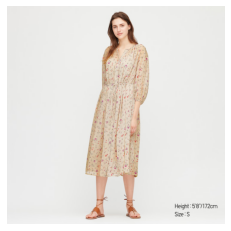

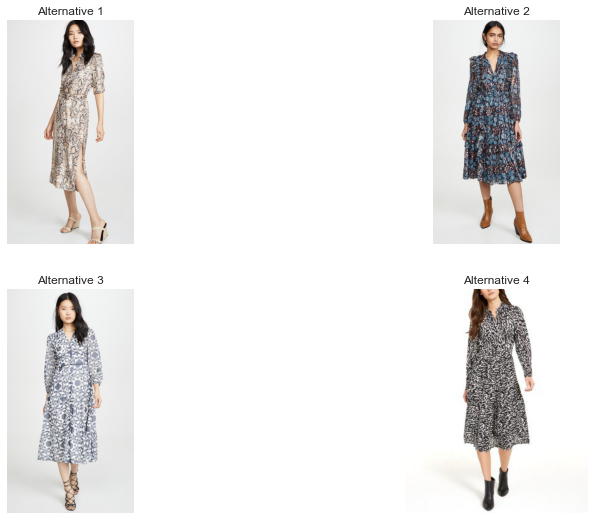

Link to the photo 1: https://www.shopstyle.com/g/women/bb-dakota/python-print-shirtdress/801535849
Link to the photo 2: https://www.shopstyle.com/g/women/ulla-johnson/seraphina-dress/815507839
Link to the photo 3: https://www.shopstyle.com/g/women/shoshanna/demetria-dress/819285035
Link to the photo 4: https://www.shopstyle.com/g/women/alfani/petite-belted-shirtdress-created-for-macys/824168149


In [77]:
show_img_2('1_img.jpg', result, 0, 10, 10, 11)

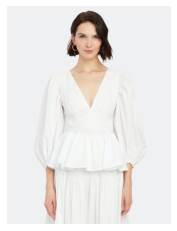

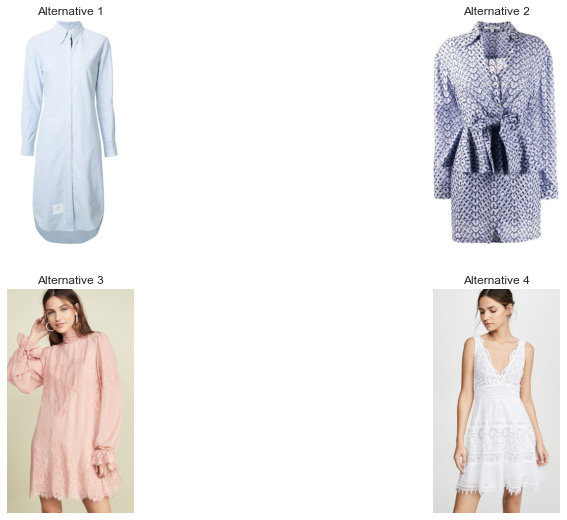

Link to the photo 1: https://www.shopstyle.com/g/women/thom-browne/button-down-knee-length-shirt-dress-with-grosgrain-placket/624018341
Link to the photo 2: https://www.shopstyle.com/g/women/derek-lam-10-crosby/nalani-peplum-shirt-dress/829962509
Link to the photo 3: https://www.shopstyle.com/g/women/we-are-hah/queen-for-a-day-dress/777322152
Link to the photo 4: https://www.shopstyle.com/g/women/temptation-positano/viareggio-mini-dress/787194443


In [78]:
show_img_2('2_img.jpg', result, 0, 10, 10, 11)

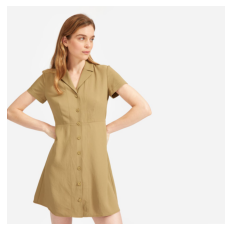

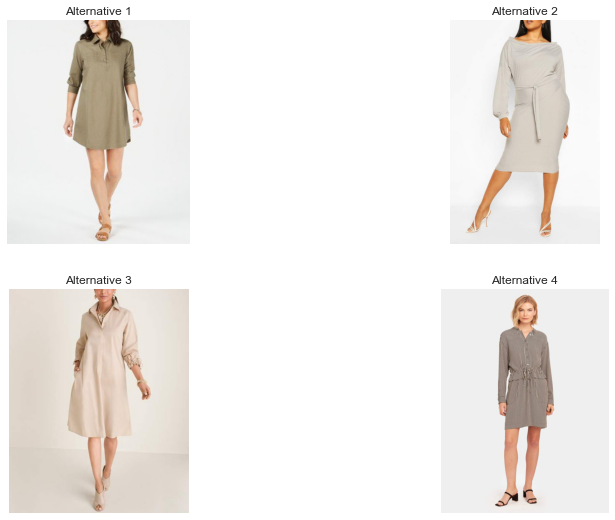

Link to the photo 1: https://www.shopstyle.com/g/women/karen-scott/mini-cotton-shirt-dress-created-for-macys/818963881
Link to the photo 2: https://www.shopstyle.com/g/women/boohoo/plus-soft-rib-slash-neck-midi-dress/822784879
Link to the photo 3: https://www.shopstyle.com/g/women/chicos/tie-sleeve-shirt-dress/830696702
Link to the photo 4: https://www.shopstyle.com/g/women/equipment/lizza-long-sleeve-drawstring-dress/822585415


In [79]:
show_img_1('3_img.jpg', result, 0, 10, 10, 11)

_**Disclaimer:** unfortunately not all recommendations came out nicely, definitely further work is required._